In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, exp
import pandas as pd
from pandas import read_csv
import scipy
import statistics as stat
from scipy.stats import poisson, nbinom, chisquare
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy import asarray as ar,exp
from scipy import stats
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import datetime

In [1]:
import numpy as np
from numpy import array, exp
import pandas as pd
from pandas import read_csv

In [3]:
data1 = pd.read_csv("2.5kV_2.csv")
data2 = pd.read_csv("2.5kV_3.csv")
data3 = pd.read_csv("2.5kV_4.csv")
data4 = pd.read_csv("2.5kV_5.csv")
data5 = pd.read_csv("3kV_2.csv")
data6 = pd.read_csv("3kV_3.csv")
data7 = pd.read_csv("3kV_4.csv")
data8 = pd.read_csv("3kV_5.csv")
data9 = pd.read_csv("3.5kV_2.csv")
data10 = pd.read_csv("3.5kV_3.csv")
data11 = pd.read_csv("3.5kV_4.csv")
data12 = pd.read_csv("3.5kV_5.csv")
data13 = pd.read_csv("4kV_2.csv")
data14 = pd.read_csv("4kV_3.csv")
data15 = pd.read_csv("4kV_4.csv")
data16 = pd.read_csv("4kV_5.csv")

In [71]:
data16

,Time,ElapsedTime
0,9.04,1.20
1,11.43,2.39
2,14.01,2.58
3,16.12,2.11
4,18.82,2.70
5,21.43,2.61
6,24.09,2.66
7,27.12,3.03
8,29.75,2.63
9,32.64,2.89


In [56]:
def DataFrame(arr, name):
    
    arr.columns = ["Time","ElapsedTime"]
    
    x = []    
    for i in range(0, len(arr["Time"])-1):
        x.append((arr["Time"][i] + arr["Time"][i+1])/2)
    for k in range(0, len(x)):
        x[k] = x[k] - x[0]
        
    y = np.array(1/(arr["ElapsedTime"]))
    y = y[:-1]
    
    sx = np.zeros(len(x))
    for i in np.arange(0, len(x)):
        sx[i] = 0.3
    
    sy = np.zeros(len(y))
    for i in np.arange(0, len(y)):
        sy[i] = 0.6*y[i]**2

    con = np.concatenate((x, y, sx, sy), axis = 0)
    new_data = np.array(con).reshape(4,len(arr)-1)
    new_csv = pd.DataFrame(new_data.T, index = None, columns = None)
    new_csv.to_csv(path_or_buf = name + ".txt", sep = " ", header = False , index = False)

DataFrame(data1, "2.5kV 2 squezes")
DataFrame(data2, "2.5kV 3 squezes")
DataFrame(data3, "2.5kV 4 squezes")
DataFrame(data4, "2.5kV 5 squezes")
DataFrame(data5, "3kV 2 squezes")
DataFrame(data6, "3kV 3 squezes")
DataFrame(data7, "3kV 4 squezes")
DataFrame(data8, "3kV 5 squezes")
DataFrame(data9, "3.5kV 2 squezes")
DataFrame(data10, "3.5kV 3 squezes")
DataFrame(data11, "3.5kV 4 squezes")
DataFrame(data12, "3.5kV 5 squezes")
DataFrame(data13, "4kV 2 squezes")
DataFrame(data14, "4kV 3 squezes")
DataFrame(data15, "4kV 4 squezes")
DataFrame(data16, "4kV 5 squezes")

[[0.00000000e+00 1.04100000e+01 1.46950000e+01 1.90700000e+01
  2.37300000e+01 2.88550000e+01 3.45150000e+01 4.02050000e+01
  4.63450000e+01 5.28900000e+01 8.01750000e+01 1.08175000e+02
  1.17000000e+02 1.27295000e+02 1.39485000e+02 1.52375000e+02
  1.87535000e+02 2.27275000e+02 2.70530000e+02 3.24370000e+02
  3.97305000e+02]
 [3.75939850e-01 2.53807107e-01 2.33644860e-01 2.33100233e-01
  2.24215247e-01 2.05761317e-01 1.85528757e-01 1.68634064e-01
  1.83486239e-01 1.46412884e-01 1.59744409e-01 1.20336943e-01
  1.30039012e-01 1.00401606e-01 9.40733772e-02 7.27272727e-02
  8.31255195e-02 5.46746856e-02 4.71920717e-02 3.94944708e-02
  2.36071766e-02]
 [3.00000000e-01 3.00000000e-01 3.00000000e-01 3.00000000e-01
  3.00000000e-01 3.00000000e-01 3.00000000e-01 3.00000000e-01
  3.00000000e-01 3.00000000e-01 3.00000000e-01 3.00000000e-01
  3.00000000e-01 3.00000000e-01 3.00000000e-01 3.00000000e-01
  3.00000000e-01 3.00000000e-01 3.00000000e-01 3.00000000e-01
  3.00000000e-01]
 [8.47984623e-02

0.2824650047424452
0.008245716910700557


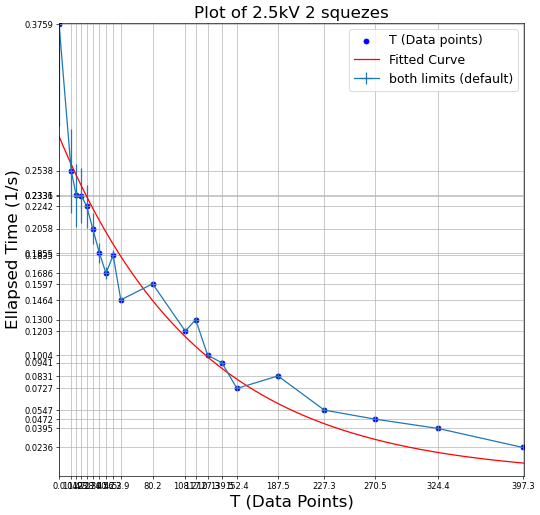

0.36145120021967536
0.006974806172492401


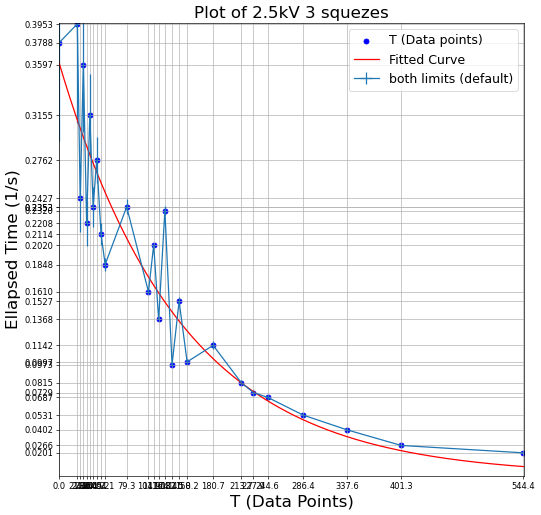

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.729927007298681
1.0


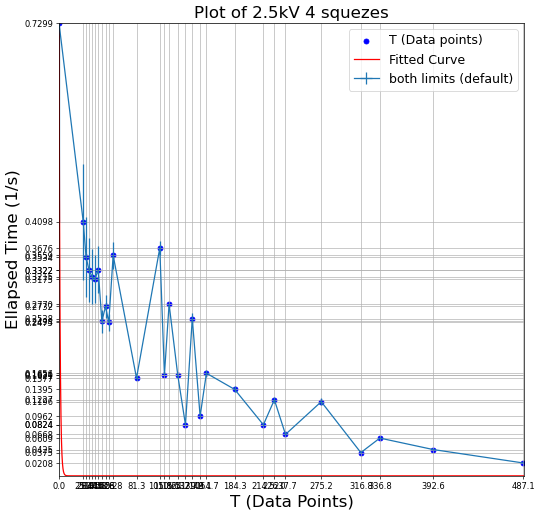

0.6612160611898903
0.01239509315750213


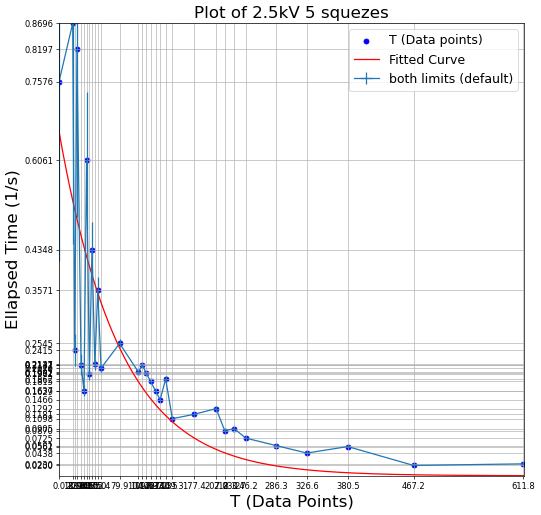

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.12376237623571251
1.0


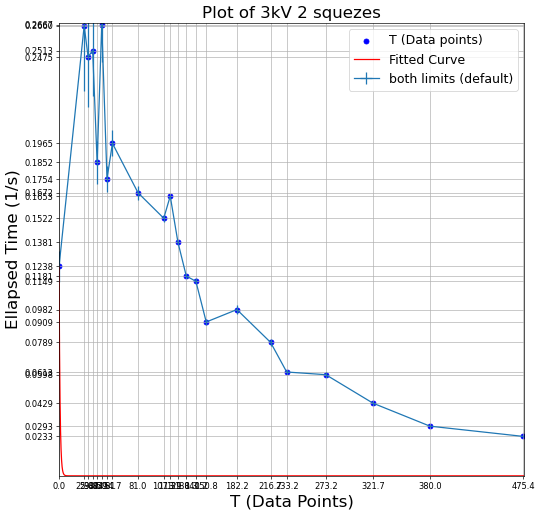

0.38789113323882235
0.006855925770443787


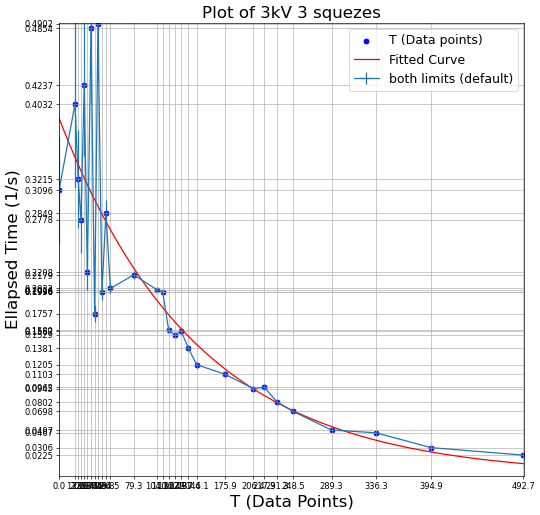

0.38538800833691905
0.00635480135266887


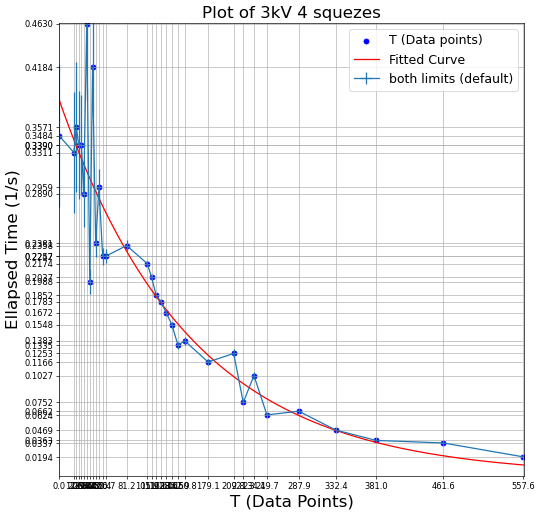

0.6998338642365214
0.009318601933054815


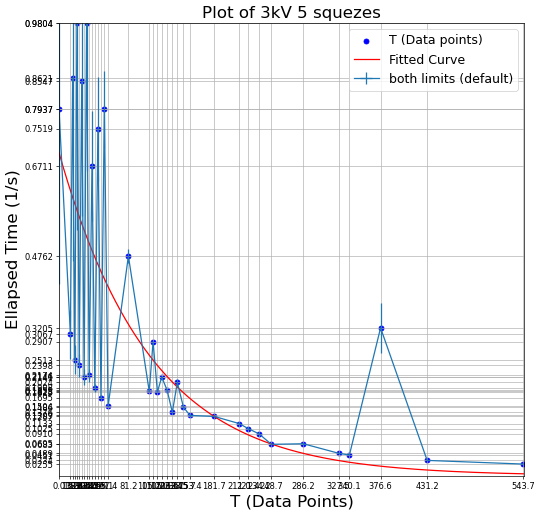

C:\Users\kubra\AppData\Local\Temp\ipykernel_31552\1460384366.py:33: RuntimeWarning: overflow encountered in exp
  return np.exp(-a*x/b)*c/d


0.2905621863637719
0.0056462030641201795


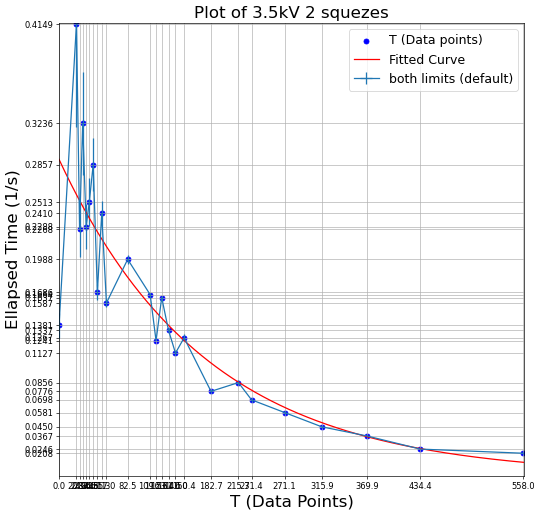

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.45454545454426487
1.0


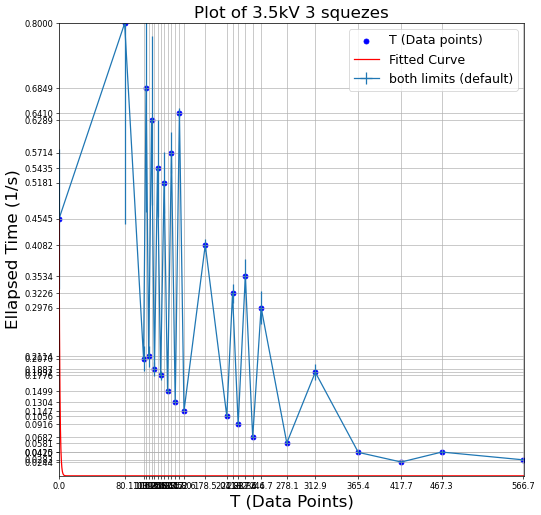

0.5697790502222801
0.009149284872241823


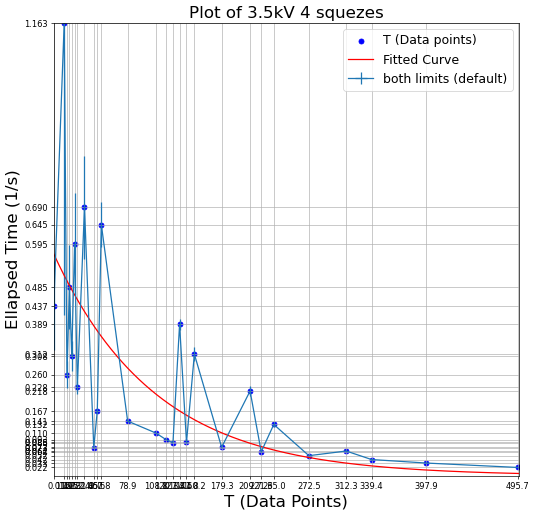

0.4056191006902117
0.0071387980918329865


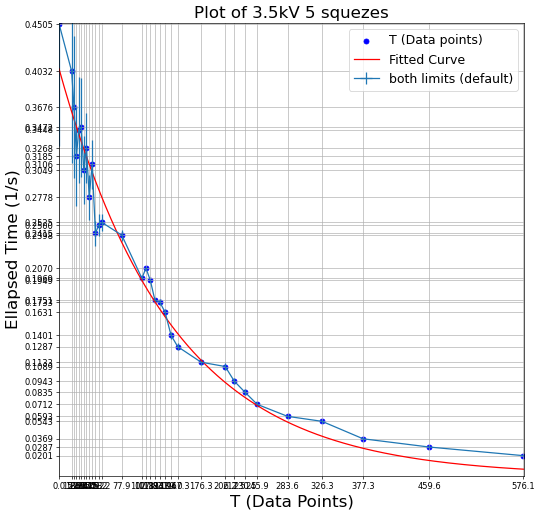

0.3730831476290215
0.00850078815746276


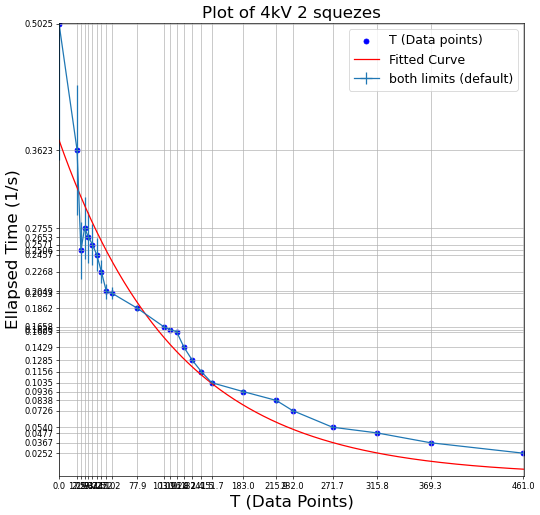

0.462213471630157
0.009846089721198084


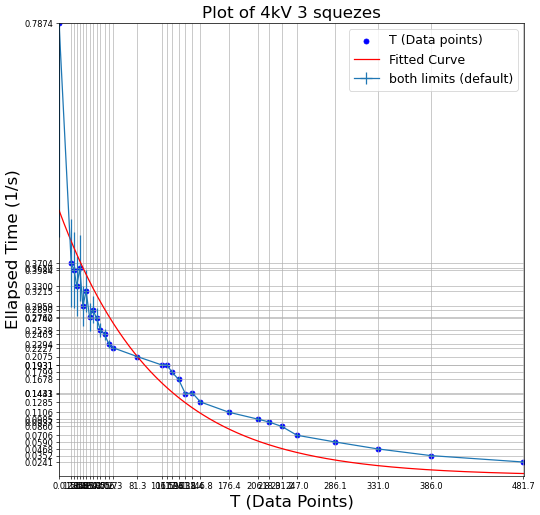

0.5865585194741902
0.014487926645882835


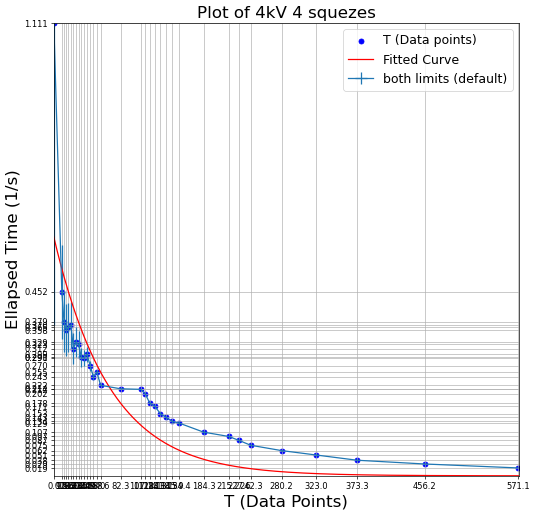

0.5083282369387014
0.008812821459157587


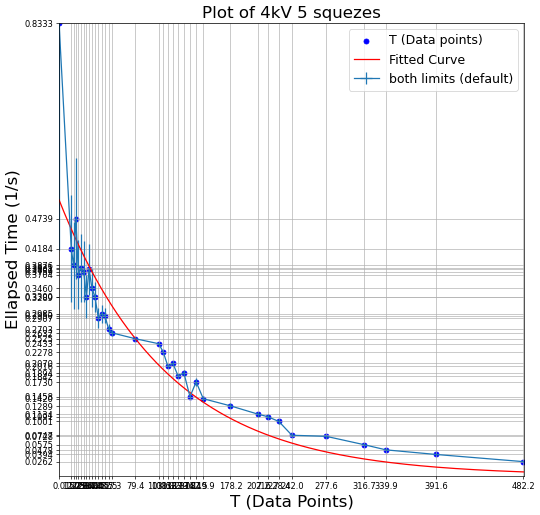

In [53]:
l = []
def plot1(arr, name):
    plt.figure(figsize = (10, 10), dpi = 60)
    
    arr.columns = ["Time","EllapsedTime"]
    
    x = []    
    for i in range(0, len(arr["Time"])-1):
        x.append((arr["Time"][i] + arr["Time"][i+1])/2)
    for k in range(0, len(x)):
        x[k] = x[k] - x[0]
        
    y = np.array(1/(arr["EllapsedTime"]))
    y = y[:-1]
    
    erx = np.zeros(len(x))
    for i in np.arange(0, len(x)):
        erx[i] = 0.3
    
    ery = np.zeros(len(y))
    for i in np.arange(0, len(y)):
        ery[i] = 0.6*y[i]**2  
    
    plt.scatter(x, y, label = 'T (Data points)', color = 'blue')
    
    k = np.linspace(-0.6, 0.6, len(y))
    yerr = k*y**2
    xerr = np.linspace(-0.3, 0.3, len(x))
    
    plt.errorbar(x, y, xerr = xerr, yerr = yerr, label = 'both limits (default)')
    
    def func(x, a, b, c, d):
        return np.exp(-a*x/b)*c/d

    #popt, pcov = curve_fit(func, x, y, sigma = ery, maxfev = 50000)
    popt, pcov = curve_fit(func, x, y, maxfev = 50000)
    a = popt[0]
    b = popt[1]
    c = popt[2]
    d = popt[3]
    
    print(c/d)
    
    l_ambda = a/b
    print(l_ambda)
    l.append(l_ambda)
    
    x_plot = np.linspace(np.min(x)-1, np.max(x) + 1, 20000)
    plt.plot(x_plot, func(x_plot, *popt), label = "Fitted Curve", color = 'red')
    plt.legend(loc = 'upper right', fontsize = 15)
    plt.grid(True)
    plt.xlim(0, max(x) + 1)
    plt.yticks(y)
    plt.xticks(x)
    plt.ylim(0, max(y) + 0.001)
    plt.title("Plot of " + name, fontsize = 20)
    plt.xlabel("T (Data Points)", fontsize = 20)
    plt.ylabel("Ellapsed Time (1/s)", fontsize = 20)
    #plt.savefig("Counts vs Applied Voltage.png")
    plt.show()
    
plot1(data1, "2.5kV 2 squezes")
plot1(data2, "2.5kV 3 squezes")
plot1(data3, "2.5kV 4 squezes")
plot1(data4, "2.5kV 5 squezes")
plot1(data5, "3kV 2 squezes")
plot1(data6, "3kV 3 squezes")
plot1(data7, "3kV 4 squezes")
plot1(data8, "3kV 5 squezes")
plot1(data9, "3.5kV 2 squezes")
plot1(data10, "3.5kV 3 squezes")
plot1(data11, "3.5kV 4 squezes")
plot1(data12, "3.5kV 5 squezes")
plot1(data13, "4kV 2 squezes")
plot1(data14, "4kV 3 squezes")
plot1(data15, "4kV 4 squezes")
plot1(data16, "4kV 5 squezes")

In [54]:
l_ambda

[0.0054,
 0.004186,
 0.004659,
 0.005742,
 0.004476,
 0.004991,
 0.004429,
 0.004041,
 0.003968,
 0.003204,
 0.003474,
 0.004249,
 0.004936,
 0.005198,
 0.004425,
 0.005283]

In [52]:
l_ambda = [0.005400, 0.004186, 0.004659, 0.005742, 0.004476, 0.004991, 0.004429, 0.004041, 0.003968, 0.003204, 0.003474, 0.004249, 0.004936, 0.005198, 0.004425, 0.005283]
sigma = [8.383*10**-5, 6.981*10**-5, 7.138*10**-5, 6.615*10**-5, 6.939*10**-5, 7.367*10**-5, 5.866*10**-5, 7.096*10**-5, 6.261*10**-5, 0.0001407, 5.131*10**-5, 6.136*10**-5, 8.19*10**-5, 7.785*10**-5, 5.918*10**-5, 8.457*10**-5]
w = []
for i in np.arange(0, len(sigma)):
    w.append(1/sigma[i]**2*l_ambda[i])
w_tot = 0
i = 0

while i <= len(w)-1:   
    w_tot = w_tot + w[i]
    i = i+1
    
s_tot = 0
i = 0
while i <= len(sigma)-1:   
    s_tot = s_tot + 1/sigma[i]**2
    i = i+1
    
weighted_mean = w_tot/s_tot
std = np.sqrt(1/s_tot)
half_life = np.log(2)/weighted_mean
std_half_life = np.sqrt((np.log(2)*weighted_mean**-2)**2*std**2)

0.5948505147898484

In [16]:
l_sigma = stat.mean(l)
l_sigma = stat.stdev(l)
l_weight = 1/l_sigma**2
print(l_weight)

164563.22239472056


C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


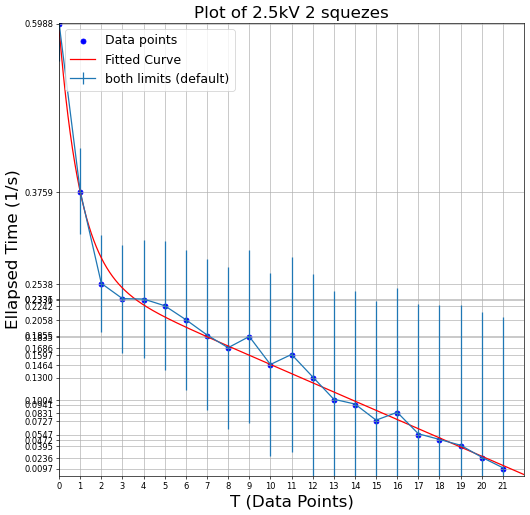

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


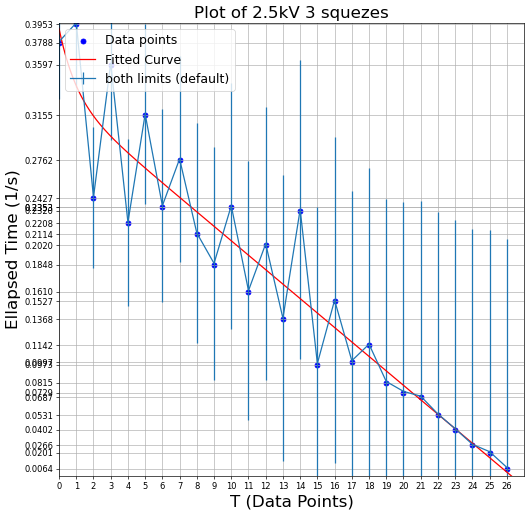

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


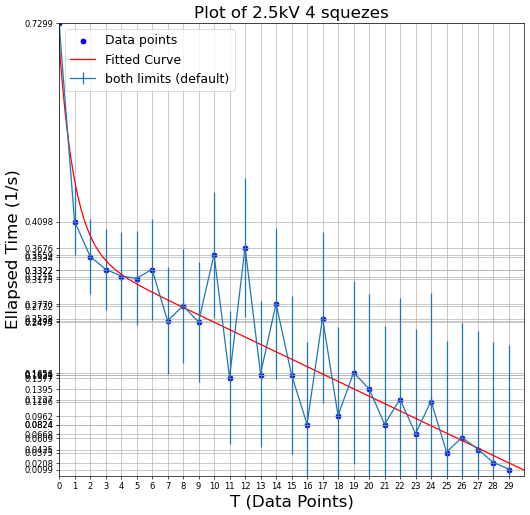

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


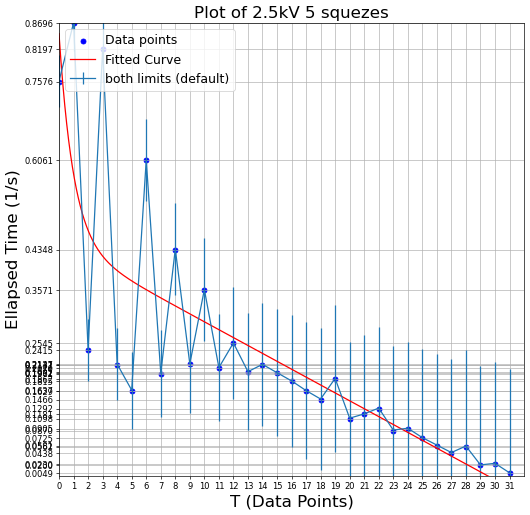

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


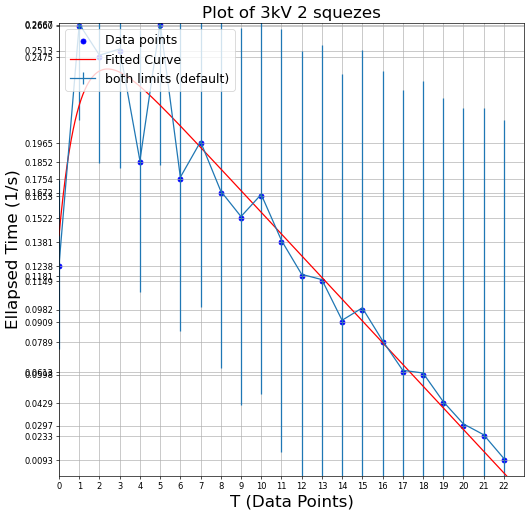

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


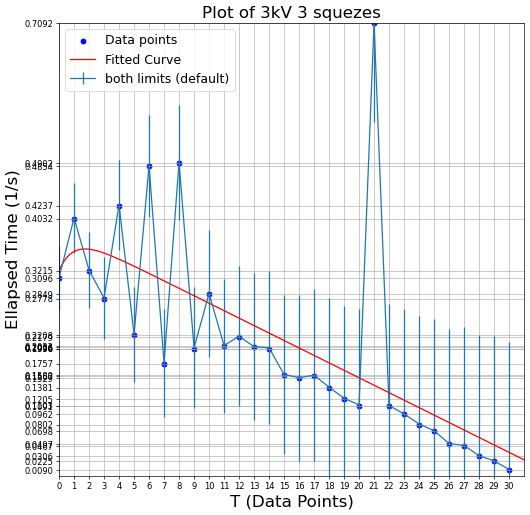

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


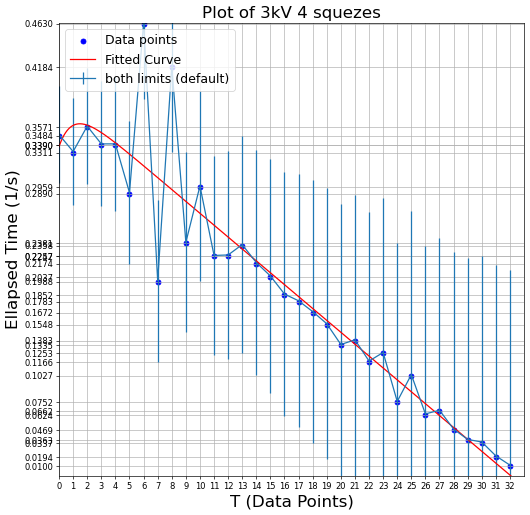

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


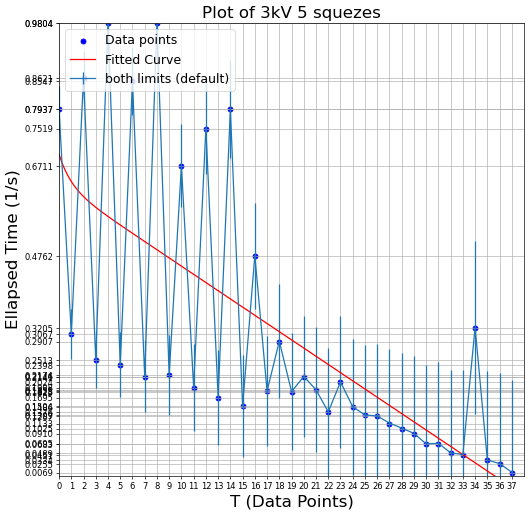

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


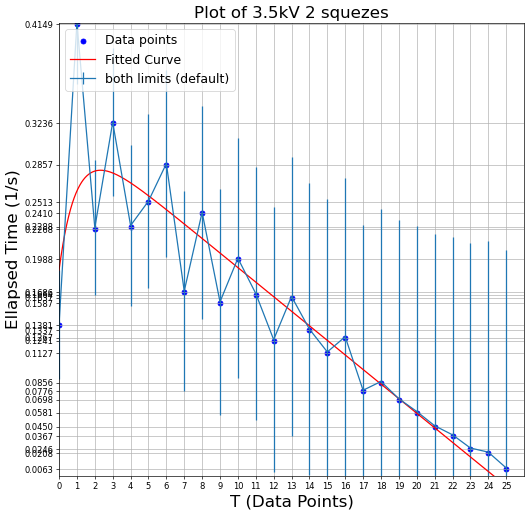

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


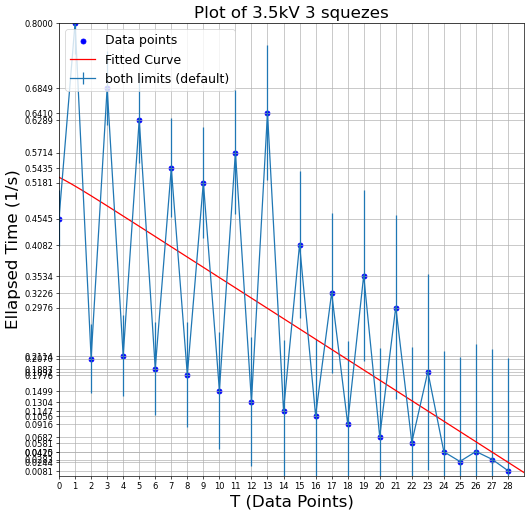

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


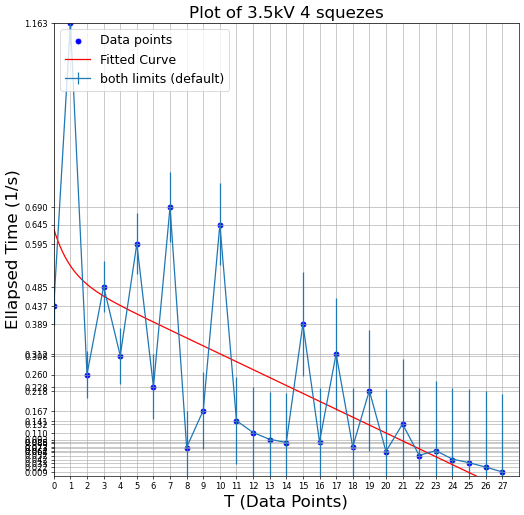

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


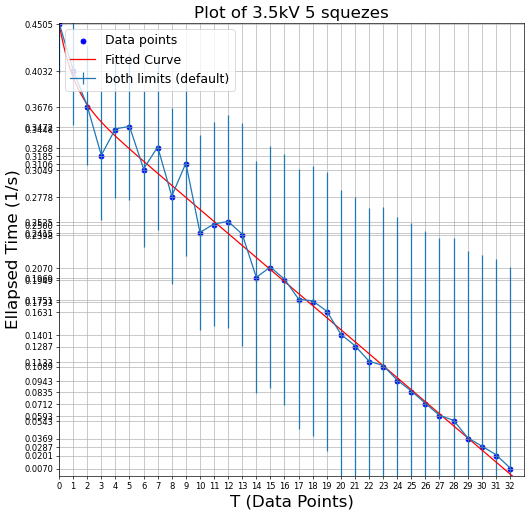

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


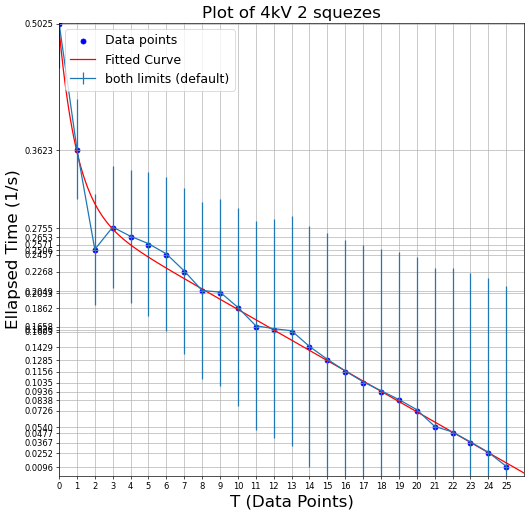

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


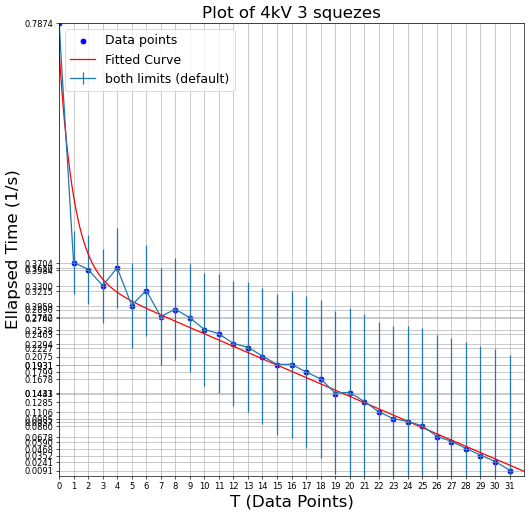

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


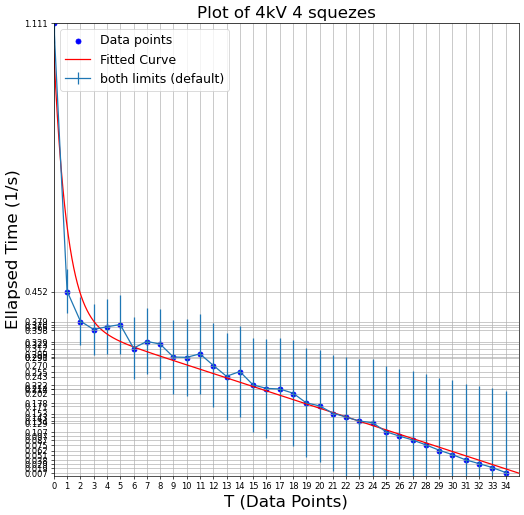

C:\Users\kubra\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


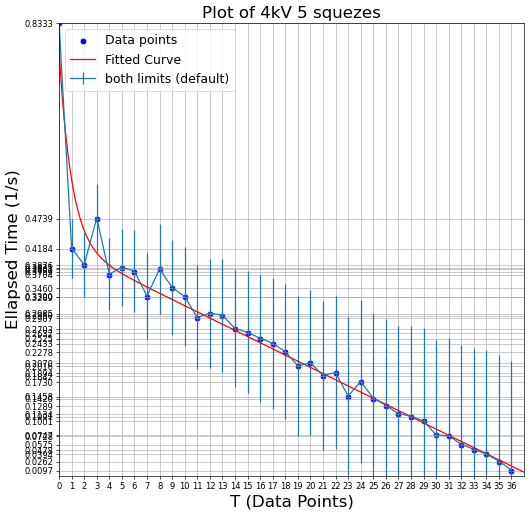

In [36]:
def plot1(arr, name):
    plt.figure(figsize = (10, 10), dpi = 60)
    
    arr.columns = ["EllapsedTime"]
    x = np.arange(len(arr))
    y = 1/(arr["EllapsedTime"])

    plt.scatter(x, y, label = 'Data points', color = 'blue')
    
    yerr = np.linspace(0.05, 0.2, len(arr))

    plt.errorbar(x, y + 0.001, yerr = yerr, label='both limits (default)')

    def func(x, a, b, c, d):
        return a*np.exp(-x) + b*x + d

    popt, pcov = curve_fit(func, x, y, maxfev = 10000)
    x_plot = np.linspace(np.min(x)-1, np.max(x) + 1, 5000)
    plt.plot(x_plot, func(x_plot, *popt), label = "Fitted Curve", color = 'red')
    plt.legend(loc = 'upper left', fontsize = 15)
    plt.grid(True)
    plt.xlim(0, max(x) + 1)
    plt.yticks(y)
    plt.xticks(x)
    plt.ylim(0, max(y) + 0.001)
    plt.title("Plot of " + name, fontsize = 20)
    plt.xlabel("T (Data Points)", fontsize = 20)
    plt.ylabel("Ellapsed Time (1/s)", fontsize = 20)
    #plt.savefig("Counts vs Applied Voltage.png")
    plt.show()
    
plot1(data1, "2.5kV 2 squezes")
plot1(data2, "2.5kV 3 squezes")
plot1(data3, "2.5kV 4 squezes")
plot1(data4, "2.5kV 5 squezes")
plot1(data5, "3kV 2 squezes")
plot1(data6, "3kV 3 squezes")
plot1(data7, "3kV 4 squezes")
plot1(data8, "3kV 5 squezes")
plot1(data9, "3.5kV 2 squezes")
plot1(data10, "3.5kV 3 squezes")
plot1(data11, "3.5kV 4 squezes")
plot1(data12, "3.5kV 5 squezes")
plot1(data13, "4kV 2 squezes")
plot1(data14, "4kV 3 squezes")
plot1(data15, "4kV 4 squezes")
plot1(data16, "4kV 5 squezes")

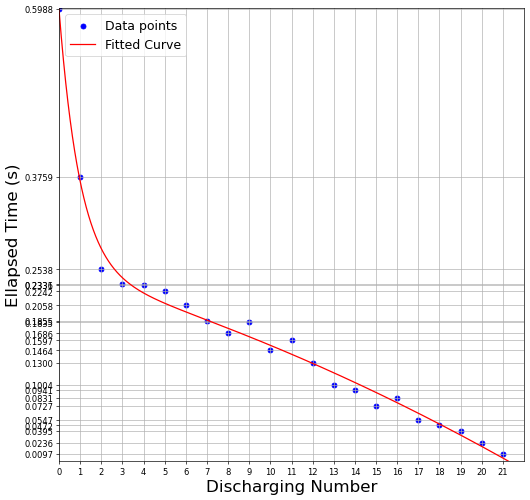

In [28]:
data1 = pd.read_csv("2.5kV_2.csv")
x = np.arange(len(data1))
y = 1/(data1["EllapsedTime"])


plt.figure(figsize = (10, 10), dpi = 60)
#plt.scatter(df.volts, df.counts, label = 'Data points', color = 'blue')
plt.scatter(x, y, label = 'Data points', color = 'blue')

def func(x, a, b, c, d):
    return (a*np.exp(-x) + b*x**2 +c*x + d)

popt, pcov = curve_fit(func, x, y, maxfev = 10000)
x_plot = np.linspace(np.min(x)-1,np.max(x)+1, 5000)
plt.plot(x_plot, func(x_plot, *popt), label = "Fitted Curve", color = 'red')
plt.legend(loc = 'upper left', fontsize = 15)
plt.grid(True)
plt.xlim(0, max(x)+1)
plt.yticks(y)
plt.xticks(x)
plt.ylim(0, max(y)+0.001)
plt.xlabel("Discharging Number", fontsize = 20)
plt.ylabel("Ellapsed Time (s)", fontsize = 20)
#plt.savefig("Counts vs Applied Voltage.png")
plt.show()

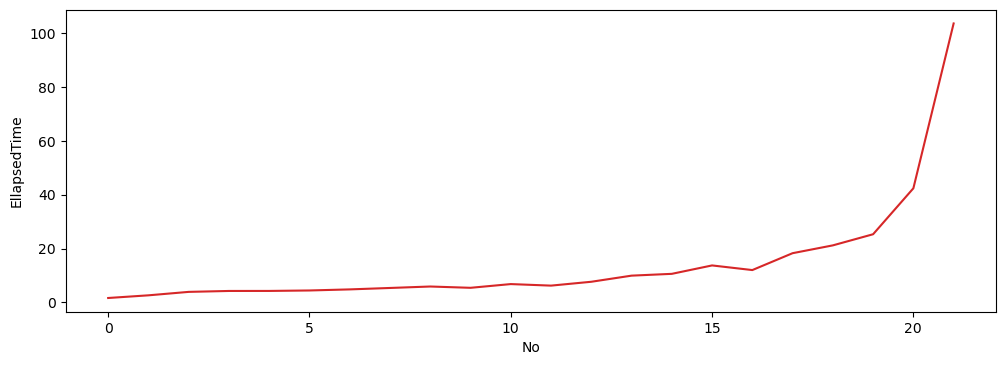

In [67]:
data1.columns = ["EllapsedTime"]

def plot_df(data1, x, y, title="", xlabel = "No", ylabel = "EllapsedTime", dpi = 100):
    plt.figure(figsize=(12,4), dpi = dpi)
    plt.plot(x, y, color = 'tab:red')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()
    

plot_df(data1, x = np.arange(22), y = data1["EllapsedTime"], title = '')